<h1> Breast Cancer Predictions</h1>

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.decomposition import PCA

In [246]:
cancer_df  = pd.read_csv("/Users/beatrizruiz/Downloads/data-4.csv")
#print(cancer_df.columns)
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

X = cancer_df[features]
X.head()

y = cancer_df['diagnosis']

cancer_df[0::20]




,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.26540,0.4601,0.11890
20,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.031100,...,14.50,20.49,96.09,630.5,0.13120,0.27760,0.189000,0.07283,0.3184,0.08183
40,855167,1,13.440,21.58,86.18,563.0,0.08162,0.06031,0.031100,0.020310,...,15.93,30.25,102.50,787.9,0.10940,0.20430,0.208500,0.11120,0.2994,0.07146
60,858970,0,10.170,14.88,64.55,311.9,0.11340,0.08061,0.010840,0.012900,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.021680,0.02579,0.3557,0.08020
80,861103,0,11.450,20.97,73.81,401.5,0.11020,0.09362,0.045910,0.022330,...,13.11,32.16,84.53,525.1,0.15570,0.16760,0.175500,0.06127,0.2762,0.08851
100,862717,1,13.610,24.98,88.05,582.7,0.09488,0.08511,0.086250,0.044890,...,16.99,35.27,108.60,906.5,0.12650,0.19430,0.316900,0.11840,0.2651,0.07397
120,865137,0,11.410,10.82,73.34,403.3,0.09373,0.06685,0.035120,0.026230,...,12.82,15.97,83.74,510.5,0.15480,0.23900,0.210200,0.08958,0.3016,0.08523
140,868999,0,9.738,11.97,61.24,288.5,0.09250,0.04102,0.000000,0.000000,...,10.62,14.10,66.53,342.9,0.12340,0.07204,0.000000,0.00000,0.3105,0.08151
160,8711561,0,11.750,20.18,76.10,419.8,0.10890,0.11410,0.068430,0.037380,...,13.32,26.21,88.91,543.9,0.13580,0.18920,0.195600,0.07909,0.3168,0.07987
180,873592,1,27.220,21.87,182.10,2250.0,0.10940,0.19140,0.287100,0.187800,...,33.12,32.85,220.80,3216.0,0.14720,0.40340,0.534000,0.26880,0.2856,0.08082


In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_scale = preprocessing.scale(X)

X_scaled = pd.DataFrame(X_scale)



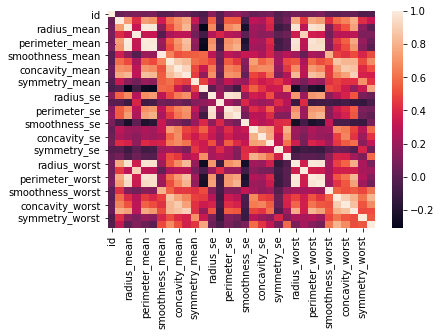

In [206]:
sns.heatmap(cancer_df.corr())

<h1> Random Forest: Pavit Chawla </h1>

In [207]:
from sklearn.ensemble import RandomForestClassifier
my_RandomForest =RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=1)
my_RandomForest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=29, random_state=1)

In [208]:
y_predict_randomforest = my_RandomForest.predict(X_test)
score_randomforest = accuracy_score(y_test,y_predict_randomforest)
print("Accuracy Random Forest",score_randomforest)

Accuracy Random Forest 0.9415204678362573


In [209]:
predict_proba_randomforest = my_RandomForest.predict_proba(X_test)
# Estimating the probability (likelihood) of Each Label: 
randomforestFpr, randomforestTpr, thresholds = metrics.roc_curve(y_test, predict_proba_randomforest[:,1], pos_label=1)
# print(randomforestFpr)
# print(randomforestTpr)

randomforestAUC = metrics.auc(randomforestFpr, randomforestTpr)
print("Random Forest AUC",randomforestAUC)

Random Forest AUC 0.9811875367430923


<h1> ANN: Sana Shaikh </h1>

In [210]:
from sklearn.neural_network import MLPClassifier


#ANN with 15 neurons in one hidden layer 
can_ANN = MLPClassifier(hidden_layer_sizes = (15,), random_state = 1, learning_rate_init = 0.02, 
                       solver = 'adam', alpha = 1, verbose = True, activation = 'logistic')

can_ANN.fit(X_train, y_train)
print(can_ANN.coefs_)
print(can_ANN.intercepts_)
y_predict_ann = can_ANN.predict(X_test)
print(y_predict_ann)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


y_predict_prob_ann = can_ANN.predict_proba(X_test)
print(y_predict_ann,'\n')
print(y_predict_prob_ann)


from sklearn import metrics

ANN_fpr, ANN_tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_ann[:,1], pos_label=1)

# print(fpr)
# print("\n\n\n")
# print(tpr)

# AUC:
ANN_AUC = metrics.auc(ANN_fpr, ANN_tpr)
print(ANN_AUC)

Iteration 1, loss = 0.71928355
Iteration 2, loss = 0.65024187
Iteration 3, loss = 0.63939084
Iteration 4, loss = 0.63817226
Iteration 5, loss = 0.61352776
Iteration 6, loss = 0.60149986
Iteration 7, loss = 0.58552584
Iteration 8, loss = 0.59547936
Iteration 9, loss = 0.59104510
Iteration 10, loss = 0.57367257
Iteration 11, loss = 0.56353235
Iteration 12, loss = 0.55852379
Iteration 13, loss = 0.56557134
Iteration 14, loss = 0.53639422
Iteration 15, loss = 0.53620547
Iteration 16, loss = 0.52010411
Iteration 17, loss = 0.52134790
Iteration 18, loss = 0.50417192
Iteration 19, loss = 0.49654566
Iteration 20, loss = 0.48593748
Iteration 21, loss = 0.47725131
Iteration 22, loss = 0.46963660
Iteration 23, loss = 0.45724633
Iteration 24, loss = 0.44696950
Iteration 25, loss = 0.43394863
Iteration 26, loss = 0.42485740
Iteration 27, loss = 0.43940096
Iteration 28, loss = 0.42042898
Iteration 29, loss = 0.42633441
Iteration 30, loss = 0.43095701
Iteration 31, loss = 0.39203192
Iteration 32, los

<h1> GridSearch: Beatriz Ruiz</h1>

In [211]:
seed = 1
np.random.seed(seed)

# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
neurons = [(i,) for i in range(5,100,5)]

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neurons)
#print(param_grid,'\n')



# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(can_ANN, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(X_scaled, y)



Iteration 1, loss = 0.71875254
Iteration 2, loss = 0.58073145
Iteration 3, loss = 0.51098553
Iteration 4, loss = 0.46717322
Iteration 5, loss = 0.43040872
Iteration 6, loss = 0.39693231
Iteration 7, loss = 0.36601674
Iteration 8, loss = 0.33837922
Iteration 9, loss = 0.31402472
Iteration 10, loss = 0.29346304
Iteration 11, loss = 0.27547888
Iteration 12, loss = 0.26045367
Iteration 13, loss = 0.24687524
Iteration 14, loss = 0.23566253
Iteration 15, loss = 0.22582529
Iteration 16, loss = 0.21767651
Iteration 17, loss = 0.21020359
Iteration 18, loss = 0.20397435
Iteration 19, loss = 0.19849736
Iteration 20, loss = 0.19374380
Iteration 21, loss = 0.18952605
Iteration 22, loss = 0.18584647
Iteration 23, loss = 0.18265739
Iteration 24, loss = 0.17967027
Iteration 25, loss = 0.17727579
Iteration 26, loss = 0.17486377
Iteration 27, loss = 0.17281093
Iteration 28, loss = 0.17098861
Iteration 29, loss = 0.16949421
Iteration 30, loss = 0.16779855
Iteration 31, loss = 0.16636604
Iteration 32, los

Iteration 99, loss = 0.14501290
Iteration 100, loss = 0.14542737
Iteration 101, loss = 0.14541725
Iteration 102, loss = 0.14560833
Iteration 103, loss = 0.14537711
Iteration 104, loss = 0.14508965
Iteration 105, loss = 0.14478650
Iteration 106, loss = 0.14485536
Iteration 107, loss = 0.14500521
Iteration 108, loss = 0.14530240
Iteration 109, loss = 0.14468422
Iteration 110, loss = 0.14489086
Iteration 111, loss = 0.14509411
Iteration 112, loss = 0.14546050
Iteration 113, loss = 0.14508802
Iteration 114, loss = 0.14491811
Iteration 115, loss = 0.14492957
Iteration 116, loss = 0.14501134
Iteration 117, loss = 0.14528040
Iteration 118, loss = 0.14575473
Iteration 119, loss = 0.14554763
Iteration 120, loss = 0.14469279
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.71988154
Iteration 2, loss = 0.57758245
Iteration 3, loss = 0.50711142
Iteration 4, loss = 0.46323297
Iteration 5, loss = 0.42697545
Iteration 6, loss = 0.39460666

Iteration 53, loss = 0.15227013
Iteration 54, loss = 0.15194125
Iteration 55, loss = 0.15190121
Iteration 56, loss = 0.15168082
Iteration 57, loss = 0.15131053
Iteration 58, loss = 0.15133783
Iteration 59, loss = 0.15131443
Iteration 60, loss = 0.15093499
Iteration 61, loss = 0.15087011
Iteration 62, loss = 0.15061559
Iteration 63, loss = 0.15046819
Iteration 64, loss = 0.15054712
Iteration 65, loss = 0.15020688
Iteration 66, loss = 0.15016589
Iteration 67, loss = 0.15013058
Iteration 68, loss = 0.14998744
Iteration 69, loss = 0.14985299
Iteration 70, loss = 0.14997024
Iteration 71, loss = 0.14974821
Iteration 72, loss = 0.14995267
Iteration 73, loss = 0.14959405
Iteration 74, loss = 0.14938812
Iteration 75, loss = 0.14947374
Iteration 76, loss = 0.14934338
Iteration 77, loss = 0.14911465
Iteration 78, loss = 0.14928234
Iteration 79, loss = 0.14913843
Iteration 80, loss = 0.14931996
Iteration 81, loss = 0.14924578
Iteration 82, loss = 0.14895551
Iteration 83, loss = 0.14924601
Iteratio

Iteration 7, loss = 0.37023752
Iteration 8, loss = 0.34291132
Iteration 9, loss = 0.31882541
Iteration 10, loss = 0.29779719
Iteration 11, loss = 0.27937578
Iteration 12, loss = 0.26374036
Iteration 13, loss = 0.25023824
Iteration 14, loss = 0.23879196
Iteration 15, loss = 0.22881320
Iteration 16, loss = 0.22028061
Iteration 17, loss = 0.21266822
Iteration 18, loss = 0.20624044
Iteration 19, loss = 0.20083054
Iteration 20, loss = 0.19588524
Iteration 21, loss = 0.19162643
Iteration 22, loss = 0.18772851
Iteration 23, loss = 0.18428088
Iteration 24, loss = 0.18140846
Iteration 25, loss = 0.17862098
Iteration 26, loss = 0.17625828
Iteration 27, loss = 0.17424385
Iteration 28, loss = 0.17229103
Iteration 29, loss = 0.17068044
Iteration 30, loss = 0.16887163
Iteration 31, loss = 0.16749116
Iteration 32, loss = 0.16649162
Iteration 33, loss = 0.16509595
Iteration 34, loss = 0.16429816
Iteration 35, loss = 0.16315135
Iteration 36, loss = 0.16232738
Iteration 37, loss = 0.16144407
Iteration 3

Iteration 50, loss = 0.13899469
Iteration 51, loss = 0.13896829
Iteration 52, loss = 0.13929853
Iteration 53, loss = 0.13890269
Iteration 54, loss = 0.13877113
Iteration 55, loss = 0.13919579
Iteration 56, loss = 0.13857198
Iteration 57, loss = 0.13922592
Iteration 58, loss = 0.13883478
Iteration 59, loss = 0.13882723
Iteration 60, loss = 0.13902392
Iteration 61, loss = 0.13862574
Iteration 62, loss = 0.13857578
Iteration 63, loss = 0.13852306
Iteration 64, loss = 0.13907634
Iteration 65, loss = 0.13899644
Iteration 66, loss = 0.13886331
Iteration 67, loss = 0.13907034
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61540160
Iteration 2, loss = 0.44361490
Iteration 3, loss = 0.35457686
Iteration 4, loss = 0.30136530
Iteration 5, loss = 0.26409904
Iteration 6, loss = 0.23658723
Iteration 7, loss = 0.21483190
Iteration 8, loss = 0.19943040
Iteration 9, loss = 0.18821931
Iteration 10, loss = 0.17892023
Iteration 11, loss = 0.

Iteration 46, loss = 0.13778566
Iteration 47, loss = 0.13777570
Iteration 48, loss = 0.13784963
Iteration 49, loss = 0.13771697
Iteration 50, loss = 0.13783054
Iteration 51, loss = 0.13763962
Iteration 52, loss = 0.13796160
Iteration 53, loss = 0.13767166
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.62070940
Iteration 2, loss = 0.44850670
Iteration 3, loss = 0.35784458
Iteration 4, loss = 0.30315576
Iteration 5, loss = 0.26543057
Iteration 6, loss = 0.23629534
Iteration 7, loss = 0.21479272
Iteration 8, loss = 0.19907896
Iteration 9, loss = 0.18662356
Iteration 10, loss = 0.17647028
Iteration 11, loss = 0.16817601
Iteration 12, loss = 0.16143040
Iteration 13, loss = 0.15564127
Iteration 14, loss = 0.15069917
Iteration 15, loss = 0.14658079
Iteration 16, loss = 0.14319783
Iteration 17, loss = 0.14050074
Iteration 18, loss = 0.13798995
Iteration 19, loss = 0.13677268
Iteration 20, loss = 0.13557691
Iteration 21, loss = 0.

Iteration 1, loss = 0.65073193
Iteration 2, loss = 0.46603584
Iteration 3, loss = 0.36375212
Iteration 4, loss = 0.30106429
Iteration 5, loss = 0.26093248
Iteration 6, loss = 0.23221519
Iteration 7, loss = 0.21296460
Iteration 8, loss = 0.19875798
Iteration 9, loss = 0.18842143
Iteration 10, loss = 0.17866578
Iteration 11, loss = 0.17078726
Iteration 12, loss = 0.16444521
Iteration 13, loss = 0.15891495
Iteration 14, loss = 0.15442436
Iteration 15, loss = 0.15109051
Iteration 16, loss = 0.14835708
Iteration 17, loss = 0.14617205
Iteration 18, loss = 0.14443922
Iteration 19, loss = 0.14301531
Iteration 20, loss = 0.14202572
Iteration 21, loss = 0.14119512
Iteration 22, loss = 0.14061351
Iteration 23, loss = 0.13988625
Iteration 24, loss = 0.13935966
Iteration 25, loss = 0.13895340
Iteration 26, loss = 0.13869900
Iteration 27, loss = 0.13863886
Iteration 28, loss = 0.13826562
Iteration 29, loss = 0.13773690
Iteration 30, loss = 0.13758978
Iteration 31, loss = 0.13777581
Iteration 32, los

Iteration 1, loss = 0.64813792
Iteration 2, loss = 0.46554205
Iteration 3, loss = 0.36554881
Iteration 4, loss = 0.30376797
Iteration 5, loss = 0.26177863
Iteration 6, loss = 0.23311574
Iteration 7, loss = 0.21130838
Iteration 8, loss = 0.19808446
Iteration 9, loss = 0.18756942
Iteration 10, loss = 0.17774157
Iteration 11, loss = 0.16922084
Iteration 12, loss = 0.16339204
Iteration 13, loss = 0.15815209
Iteration 14, loss = 0.15352041
Iteration 15, loss = 0.14972454
Iteration 16, loss = 0.14752718
Iteration 17, loss = 0.14566568
Iteration 18, loss = 0.14330452
Iteration 19, loss = 0.14189788
Iteration 20, loss = 0.14099214
Iteration 21, loss = 0.14035294
Iteration 22, loss = 0.13950166
Iteration 23, loss = 0.13868542
Iteration 24, loss = 0.13845696
Iteration 25, loss = 0.13782051
Iteration 26, loss = 0.13781406
Iteration 27, loss = 0.13782516
Iteration 28, loss = 0.13693452
Iteration 29, loss = 0.13679258
Iteration 30, loss = 0.13681869
Iteration 31, loss = 0.13628141
Iteration 32, los

Iteration 33, loss = 0.13400999
Iteration 34, loss = 0.13358734
Iteration 35, loss = 0.13395659
Iteration 36, loss = 0.13409186
Iteration 37, loss = 0.13362096
Iteration 38, loss = 0.13493711
Iteration 39, loss = 0.13407956
Iteration 40, loss = 0.13377185
Iteration 41, loss = 0.13356846
Iteration 42, loss = 0.13338269
Iteration 43, loss = 0.13321949
Iteration 44, loss = 0.13332432
Iteration 45, loss = 0.13357620
Iteration 46, loss = 0.13304690
Iteration 47, loss = 0.13269321
Iteration 48, loss = 0.13307344
Iteration 49, loss = 0.13308694
Iteration 50, loss = 0.13251567
Iteration 51, loss = 0.13291042
Iteration 52, loss = 0.13257791
Iteration 53, loss = 0.13266984
Iteration 54, loss = 0.13323772
Iteration 55, loss = 0.13288513
Iteration 56, loss = 0.13332204
Iteration 57, loss = 0.13292962
Iteration 58, loss = 0.13261405
Iteration 59, loss = 0.13324252
Iteration 60, loss = 0.13300554
Iteration 61, loss = 0.13240705
Iteration 62, loss = 0.13360876
Iteration 63, loss = 0.13385585
Iteratio

Iteration 7, loss = 0.18369981
Iteration 8, loss = 0.17612424
Iteration 9, loss = 0.16832909
Iteration 10, loss = 0.16111132
Iteration 11, loss = 0.15571333
Iteration 12, loss = 0.15069209
Iteration 13, loss = 0.14692204
Iteration 14, loss = 0.14340440
Iteration 15, loss = 0.14139970
Iteration 16, loss = 0.14008065
Iteration 17, loss = 0.13960888
Iteration 18, loss = 0.13878436
Iteration 19, loss = 0.13790424
Iteration 20, loss = 0.13729793
Iteration 21, loss = 0.13661512
Iteration 22, loss = 0.13714313
Iteration 23, loss = 0.13680581
Iteration 24, loss = 0.13605764
Iteration 25, loss = 0.13596168
Iteration 26, loss = 0.13597272
Iteration 27, loss = 0.13647242
Iteration 28, loss = 0.13522760
Iteration 29, loss = 0.13574790
Iteration 30, loss = 0.13557415
Iteration 31, loss = 0.13544950
Iteration 32, loss = 0.13512341
Iteration 33, loss = 0.13501348
Iteration 34, loss = 0.13614869
Iteration 35, loss = 0.13555797
Iteration 36, loss = 0.13528610
Iteration 37, loss = 0.13568413
Iteration 3

Iteration 45, loss = 0.13062263
Iteration 46, loss = 0.13058351
Iteration 47, loss = 0.13055788
Iteration 48, loss = 0.13072476
Iteration 49, loss = 0.13027046
Iteration 50, loss = 0.13024533
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.62787546
Iteration 2, loss = 0.41975884
Iteration 3, loss = 0.33117058
Iteration 4, loss = 0.27735938
Iteration 5, loss = 0.24036235
Iteration 6, loss = 0.21757379
Iteration 7, loss = 0.19894640
Iteration 8, loss = 0.18697634
Iteration 9, loss = 0.17767797
Iteration 10, loss = 0.16863162
Iteration 11, loss = 0.16080254
Iteration 12, loss = 0.15436332
Iteration 13, loss = 0.14986666
Iteration 14, loss = 0.14683328
Iteration 15, loss = 0.14475763
Iteration 16, loss = 0.14272933
Iteration 17, loss = 0.14070044
Iteration 18, loss = 0.13944808
Iteration 19, loss = 0.13865357
Iteration 20, loss = 0.13750269
Iteration 21, loss = 0.13674713
Iteration 22, loss = 0.13676988
Iteration 23, loss = 0.

Iteration 24, loss = 0.13661800
Iteration 25, loss = 0.13606405
Iteration 26, loss = 0.13637387
Iteration 27, loss = 0.13567513
Iteration 28, loss = 0.13558199
Iteration 29, loss = 0.13553807
Iteration 30, loss = 0.13598240
Iteration 31, loss = 0.13534545
Iteration 32, loss = 0.13489334
Iteration 33, loss = 0.13524236
Iteration 34, loss = 0.13456084
Iteration 35, loss = 0.13416959
Iteration 36, loss = 0.13539355
Iteration 37, loss = 0.13517266
Iteration 38, loss = 0.13529408
Iteration 39, loss = 0.13492134
Iteration 40, loss = 0.13423612
Iteration 41, loss = 0.13483585
Iteration 42, loss = 0.13440198
Iteration 43, loss = 0.13491922
Iteration 44, loss = 0.13494672
Iteration 45, loss = 0.13453603
Iteration 46, loss = 0.13479105
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.63459258
Iteration 2, loss = 0.41669046
Iteration 3, loss = 0.32966925
Iteration 4, loss = 0.27768219
Iteration 5, loss = 0.24137995
Iteration 6, loss =

Iteration 62, loss = 0.13477744
Iteration 63, loss = 0.13511126
Iteration 64, loss = 0.13484021
Iteration 65, loss = 0.13357397
Iteration 66, loss = 0.13393167
Iteration 67, loss = 0.13474541
Iteration 68, loss = 0.13589018
Iteration 69, loss = 0.13423332
Iteration 70, loss = 0.13423258
Iteration 71, loss = 0.13527402
Iteration 72, loss = 0.13552058
Iteration 73, loss = 0.13469645
Iteration 74, loss = 0.13493268
Iteration 75, loss = 0.13606135
Iteration 76, loss = 0.13438841
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.63044649
Iteration 2, loss = 0.42570642
Iteration 3, loss = 0.33312689
Iteration 4, loss = 0.27691489
Iteration 5, loss = 0.23957592
Iteration 6, loss = 0.21392702
Iteration 7, loss = 0.19896066
Iteration 8, loss = 0.18793286
Iteration 9, loss = 0.17720844
Iteration 10, loss = 0.16685986
Iteration 11, loss = 0.15808411
Iteration 12, loss = 0.15168693
Iteration 13, loss = 0.14680394
Iteration 14, loss = 0.

Iteration 6, loss = 0.19696129
Iteration 7, loss = 0.18627976
Iteration 8, loss = 0.17854167
Iteration 9, loss = 0.16937833
Iteration 10, loss = 0.16140034
Iteration 11, loss = 0.15521254
Iteration 12, loss = 0.15013575
Iteration 13, loss = 0.14608843
Iteration 14, loss = 0.14354033
Iteration 15, loss = 0.14164482
Iteration 16, loss = 0.13976147
Iteration 17, loss = 0.13843566
Iteration 18, loss = 0.13796832
Iteration 19, loss = 0.13708105
Iteration 20, loss = 0.13637167
Iteration 21, loss = 0.13587910
Iteration 22, loss = 0.13567995
Iteration 23, loss = 0.13517820
Iteration 24, loss = 0.13559872
Iteration 25, loss = 0.13549948
Iteration 26, loss = 0.13517176
Iteration 27, loss = 0.13447662
Iteration 28, loss = 0.13426467
Iteration 29, loss = 0.13468557
Iteration 30, loss = 0.13459609
Iteration 31, loss = 0.13418858
Iteration 32, loss = 0.13409116
Iteration 33, loss = 0.13419663
Iteration 34, loss = 0.13425037
Iteration 35, loss = 0.13417101
Iteration 36, loss = 0.13461109
Iteration 37

Iteration 29, loss = 0.13009687
Iteration 30, loss = 0.12960661
Iteration 31, loss = 0.13002019
Iteration 32, loss = 0.13081573
Iteration 33, loss = 0.12935821
Iteration 34, loss = 0.13035976
Iteration 35, loss = 0.12993436
Iteration 36, loss = 0.12955250
Iteration 37, loss = 0.12961422
Iteration 38, loss = 0.13050900
Iteration 39, loss = 0.12993713
Iteration 40, loss = 0.12960369
Iteration 41, loss = 0.12987934
Iteration 42, loss = 0.13048665
Iteration 43, loss = 0.12956717
Iteration 44, loss = 0.13018037
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.63556496
Iteration 2, loss = 0.39273773
Iteration 3, loss = 0.28322577
Iteration 4, loss = 0.23136245
Iteration 5, loss = 0.20286516
Iteration 6, loss = 0.18921335
Iteration 7, loss = 0.18108800
Iteration 8, loss = 0.17380173
Iteration 9, loss = 0.16666270
Iteration 10, loss = 0.15920973
Iteration 11, loss = 0.15222996
Iteration 12, loss = 0.14709823
Iteration 13, loss = 0.

Iteration 41, loss = 0.13390629
Iteration 42, loss = 0.13388181
Iteration 43, loss = 0.13354484
Iteration 44, loss = 0.13355034
Iteration 45, loss = 0.13352616
Iteration 46, loss = 0.13348970
Iteration 47, loss = 0.13341573
Iteration 48, loss = 0.13387816
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.62565698
Iteration 2, loss = 0.39354988
Iteration 3, loss = 0.28315368
Iteration 4, loss = 0.23128274
Iteration 5, loss = 0.20180432
Iteration 6, loss = 0.18574841
Iteration 7, loss = 0.17929017
Iteration 8, loss = 0.17308994
Iteration 9, loss = 0.16542532
Iteration 10, loss = 0.15721069
Iteration 11, loss = 0.15074722
Iteration 12, loss = 0.14580097
Iteration 13, loss = 0.14155763
Iteration 14, loss = 0.13824277
Iteration 15, loss = 0.13704994
Iteration 16, loss = 0.13565965
Iteration 17, loss = 0.13535739
Iteration 18, loss = 0.13416442
Iteration 19, loss = 0.13340243
Iteration 20, loss = 0.13389788
Iteration 21, loss = 0.

Iteration 57, loss = 0.13254758
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.60846572
Iteration 2, loss = 0.36918949
Iteration 3, loss = 0.27006344
Iteration 4, loss = 0.22724419
Iteration 5, loss = 0.20341274
Iteration 6, loss = 0.18930661
Iteration 7, loss = 0.17996744
Iteration 8, loss = 0.17020785
Iteration 9, loss = 0.16040181
Iteration 10, loss = 0.15169533
Iteration 11, loss = 0.14422873
Iteration 12, loss = 0.13950435
Iteration 13, loss = 0.13616188
Iteration 14, loss = 0.13394049
Iteration 15, loss = 0.13291708
Iteration 16, loss = 0.13127940
Iteration 17, loss = 0.13019809
Iteration 18, loss = 0.12913054
Iteration 19, loss = 0.12841364
Iteration 20, loss = 0.12802749
Iteration 21, loss = 0.12793108
Iteration 22, loss = 0.12763800
Iteration 23, loss = 0.12749087
Iteration 24, loss = 0.12785645
Iteration 25, loss = 0.12772163
Iteration 26, loss = 0.12774849
Iteration 27, loss = 0.12719882
Iteration 28, loss = 0.

Iteration 5, loss = 0.21005281
Iteration 6, loss = 0.19843311
Iteration 7, loss = 0.18854061
Iteration 8, loss = 0.17671935
Iteration 9, loss = 0.16584160
Iteration 10, loss = 0.15618419
Iteration 11, loss = 0.15024002
Iteration 12, loss = 0.14600322
Iteration 13, loss = 0.14221396
Iteration 14, loss = 0.13960471
Iteration 15, loss = 0.13875473
Iteration 16, loss = 0.13685266
Iteration 17, loss = 0.13672478
Iteration 18, loss = 0.13460201
Iteration 19, loss = 0.13434522
Iteration 20, loss = 0.13335712
Iteration 21, loss = 0.13357802
Iteration 22, loss = 0.13405957
Iteration 23, loss = 0.13296497
Iteration 24, loss = 0.13265747
Iteration 25, loss = 0.13367140
Iteration 26, loss = 0.13327169
Iteration 27, loss = 0.13353463
Iteration 28, loss = 0.13245563
Iteration 29, loss = 0.13302179
Iteration 30, loss = 0.13250794
Iteration 31, loss = 0.13270977
Iteration 32, loss = 0.13268332
Iteration 33, loss = 0.13321106
Iteration 34, loss = 0.13180017
Iteration 35, loss = 0.13258821
Iteration 36,

Iteration 33, loss = 0.12971922
Iteration 34, loss = 0.12799410
Iteration 35, loss = 0.12921780
Iteration 36, loss = 0.12862899
Iteration 37, loss = 0.12822411
Iteration 38, loss = 0.12932087
Iteration 39, loss = 0.12851495
Iteration 40, loss = 0.12811052
Iteration 41, loss = 0.12782555
Iteration 42, loss = 0.12880827
Iteration 43, loss = 0.12818315
Iteration 44, loss = 0.12843793
Iteration 45, loss = 0.12882280
Iteration 46, loss = 0.12861579
Iteration 47, loss = 0.13098436
Iteration 48, loss = 0.12702361
Iteration 49, loss = 0.13063872
Iteration 50, loss = 0.12932734
Iteration 51, loss = 0.13060596
Iteration 52, loss = 0.12909476
Iteration 53, loss = 0.12964619
Iteration 54, loss = 0.12901509
Iteration 55, loss = 0.12904988
Iteration 56, loss = 0.12777470
Iteration 57, loss = 0.12840349
Iteration 58, loss = 0.12946820
Iteration 59, loss = 0.12854859
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.62564855
Iteration 2, lo

Iteration 38, loss = 0.13299036
Iteration 39, loss = 0.13245888
Iteration 40, loss = 0.13241016
Iteration 41, loss = 0.13208019
Iteration 42, loss = 0.13264136
Iteration 43, loss = 0.13278895
Iteration 44, loss = 0.13247828
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61907861
Iteration 2, loss = 0.36891791
Iteration 3, loss = 0.27825557
Iteration 4, loss = 0.23689087
Iteration 5, loss = 0.21466995
Iteration 6, loss = 0.20342180
Iteration 7, loss = 0.19222017
Iteration 8, loss = 0.18267873
Iteration 9, loss = 0.17239787
Iteration 10, loss = 0.16310367
Iteration 11, loss = 0.15502997
Iteration 12, loss = 0.14953579
Iteration 13, loss = 0.14519668
Iteration 14, loss = 0.14290662
Iteration 15, loss = 0.14093587
Iteration 16, loss = 0.13954780
Iteration 17, loss = 0.13902459
Iteration 18, loss = 0.13748564
Iteration 19, loss = 0.13638992
Iteration 20, loss = 0.13538955
Iteration 21, loss = 0.13466293
Iteration 22, loss = 0.

Iteration 30, loss = 0.13013202
Iteration 31, loss = 0.12919431
Iteration 32, loss = 0.12930013
Iteration 33, loss = 0.12960721
Iteration 34, loss = 0.12937789
Iteration 35, loss = 0.13024650
Iteration 36, loss = 0.12971489
Iteration 37, loss = 0.13020267
Iteration 38, loss = 0.13131318
Iteration 39, loss = 0.13089822
Iteration 40, loss = 0.12891336
Iteration 41, loss = 0.13048972
Iteration 42, loss = 0.12872148
Iteration 43, loss = 0.12882440
Iteration 44, loss = 0.12878687
Iteration 45, loss = 0.12903283
Iteration 46, loss = 0.12904579
Iteration 47, loss = 0.12960111
Iteration 48, loss = 0.12878732
Iteration 49, loss = 0.12888833
Iteration 50, loss = 0.12864320
Iteration 51, loss = 0.12931593
Iteration 52, loss = 0.12910636
Iteration 53, loss = 0.12968011
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.64295287
Iteration 2, loss = 0.39421661
Iteration 3, loss = 0.29723285
Iteration 4, loss = 0.24530269
Iteration 5, loss 

Iteration 8, loss = 0.18053956
Iteration 9, loss = 0.16757859
Iteration 10, loss = 0.15846967
Iteration 11, loss = 0.15182999
Iteration 12, loss = 0.14628552
Iteration 13, loss = 0.14197132
Iteration 14, loss = 0.13953601
Iteration 15, loss = 0.13778055
Iteration 16, loss = 0.13544720
Iteration 17, loss = 0.13355032
Iteration 18, loss = 0.13334977
Iteration 19, loss = 0.13169670
Iteration 20, loss = 0.13187462
Iteration 21, loss = 0.13031989
Iteration 22, loss = 0.13041627
Iteration 23, loss = 0.13090674
Iteration 24, loss = 0.12960672
Iteration 25, loss = 0.12991308
Iteration 26, loss = 0.12952196
Iteration 27, loss = 0.13002645
Iteration 28, loss = 0.12962827
Iteration 29, loss = 0.12996827
Iteration 30, loss = 0.13019844
Iteration 31, loss = 0.12998770
Iteration 32, loss = 0.12841578
Iteration 33, loss = 0.12939351
Iteration 34, loss = 0.12851615
Iteration 35, loss = 0.12906624
Iteration 36, loss = 0.12873367
Iteration 37, loss = 0.12944561
Iteration 38, loss = 0.13009072
Iteration 

Iteration 10, loss = 0.15827228
Iteration 11, loss = 0.15139417
Iteration 12, loss = 0.14677822
Iteration 13, loss = 0.14317035
Iteration 14, loss = 0.14078914
Iteration 15, loss = 0.13941339
Iteration 16, loss = 0.13712580
Iteration 17, loss = 0.13570094
Iteration 18, loss = 0.13465473
Iteration 19, loss = 0.13387539
Iteration 20, loss = 0.13335560
Iteration 21, loss = 0.13246322
Iteration 22, loss = 0.13277950
Iteration 23, loss = 0.13223577
Iteration 24, loss = 0.13188149
Iteration 25, loss = 0.13163506
Iteration 26, loss = 0.13238880
Iteration 27, loss = 0.13225549
Iteration 28, loss = 0.13135063
Iteration 29, loss = 0.13169711
Iteration 30, loss = 0.13053046
Iteration 31, loss = 0.13293656
Iteration 32, loss = 0.13243974
Iteration 33, loss = 0.13219766
Iteration 34, loss = 0.13112697
Iteration 35, loss = 0.13106855
Iteration 36, loss = 0.13114958
Iteration 37, loss = 0.13058539
Iteration 38, loss = 0.13161635
Iteration 39, loss = 0.13219893
Iteration 40, loss = 0.13102565
Iteratio

Iteration 7, loss = 0.18141929
Iteration 8, loss = 0.17016446
Iteration 9, loss = 0.16035904
Iteration 10, loss = 0.15068653
Iteration 11, loss = 0.14391703
Iteration 12, loss = 0.14125849
Iteration 13, loss = 0.13734354
Iteration 14, loss = 0.13417793
Iteration 15, loss = 0.13304201
Iteration 16, loss = 0.13136928
Iteration 17, loss = 0.13020543
Iteration 18, loss = 0.12945058
Iteration 19, loss = 0.12934522
Iteration 20, loss = 0.12799055
Iteration 21, loss = 0.12762583
Iteration 22, loss = 0.12688330
Iteration 23, loss = 0.12670213
Iteration 24, loss = 0.12779571
Iteration 25, loss = 0.12747019
Iteration 26, loss = 0.12663076
Iteration 27, loss = 0.12664178
Iteration 28, loss = 0.12735746
Iteration 29, loss = 0.12685187
Iteration 30, loss = 0.12637715
Iteration 31, loss = 0.12628389
Iteration 32, loss = 0.12664500
Iteration 33, loss = 0.12649068
Iteration 34, loss = 0.12598519
Iteration 35, loss = 0.12606538
Iteration 36, loss = 0.12586885
Iteration 37, loss = 0.12641141
Iteration 3

Iteration 41, loss = 0.12090823
Iteration 42, loss = 0.12140134
Iteration 43, loss = 0.12131053
Iteration 44, loss = 0.12215641
Iteration 45, loss = 0.12349537
Iteration 46, loss = 0.12183520
Iteration 47, loss = 0.12097044
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.62351255
Iteration 2, loss = 0.37765182
Iteration 3, loss = 0.27326441
Iteration 4, loss = 0.23080393
Iteration 5, loss = 0.21177789
Iteration 6, loss = 0.19955118
Iteration 7, loss = 0.18818428
Iteration 8, loss = 0.17591427
Iteration 9, loss = 0.16470902
Iteration 10, loss = 0.15597767
Iteration 11, loss = 0.14967721
Iteration 12, loss = 0.14646629
Iteration 13, loss = 0.14214586
Iteration 14, loss = 0.13952526
Iteration 15, loss = 0.13960449
Iteration 16, loss = 0.13550293
Iteration 17, loss = 0.13516358
Iteration 18, loss = 0.13645819
Iteration 19, loss = 0.13381249
Iteration 20, loss = 0.13345723
Iteration 21, loss = 0.13343885
Iteration 22, loss = 0.

Iteration 3, loss = 0.25232825
Iteration 4, loss = 0.21828749
Iteration 5, loss = 0.19982290
Iteration 6, loss = 0.19345527
Iteration 7, loss = 0.18267166
Iteration 8, loss = 0.16876298
Iteration 9, loss = 0.15762275
Iteration 10, loss = 0.15029281
Iteration 11, loss = 0.14396963
Iteration 12, loss = 0.13927805
Iteration 13, loss = 0.13632098
Iteration 14, loss = 0.13501033
Iteration 15, loss = 0.13377272
Iteration 16, loss = 0.13200186
Iteration 17, loss = 0.13194359
Iteration 18, loss = 0.13076463
Iteration 19, loss = 0.12981194
Iteration 20, loss = 0.12964892
Iteration 21, loss = 0.12902937
Iteration 22, loss = 0.12892734
Iteration 23, loss = 0.12911025
Iteration 24, loss = 0.12887212
Iteration 25, loss = 0.12966697
Iteration 26, loss = 0.12849430
Iteration 27, loss = 0.13102768
Iteration 28, loss = 0.12838833
Iteration 29, loss = 0.12958936
Iteration 30, loss = 0.12918874
Iteration 31, loss = 0.12895141
Iteration 32, loss = 0.12972261
Iteration 33, loss = 0.13027952
Iteration 34, l

Iteration 33, loss = 0.12799351
Iteration 34, loss = 0.12864822
Iteration 35, loss = 0.12946174
Iteration 36, loss = 0.12920204
Iteration 37, loss = 0.12781432
Iteration 38, loss = 0.12892475
Iteration 39, loss = 0.12932827
Iteration 40, loss = 0.12819160
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.57465843
Iteration 2, loss = 0.32770007
Iteration 3, loss = 0.24530832
Iteration 4, loss = 0.21466014
Iteration 5, loss = 0.19761447
Iteration 6, loss = 0.18943186
Iteration 7, loss = 0.17790574
Iteration 8, loss = 0.16601557
Iteration 9, loss = 0.15482601
Iteration 10, loss = 0.14873477
Iteration 11, loss = 0.14577818
Iteration 12, loss = 0.14239116
Iteration 13, loss = 0.13912780
Iteration 14, loss = 0.13774911
Iteration 15, loss = 0.13571518
Iteration 16, loss = 0.13446403
Iteration 17, loss = 0.13428008
Iteration 18, loss = 0.13319400
Iteration 19, loss = 0.13402117
Iteration 20, loss = 0.13306105
Iteration 21, loss = 0.

Iteration 27, loss = 0.13175637
Iteration 28, loss = 0.13122478
Iteration 29, loss = 0.13155642
Iteration 30, loss = 0.13072680
Iteration 31, loss = 0.13192594
Iteration 32, loss = 0.13087733
Iteration 33, loss = 0.13139376
Iteration 34, loss = 0.13004173
Iteration 35, loss = 0.13167007
Iteration 36, loss = 0.13111774
Iteration 37, loss = 0.13094375
Iteration 38, loss = 0.13019173
Iteration 39, loss = 0.13125040
Iteration 40, loss = 0.13212968
Iteration 41, loss = 0.13175888
Iteration 42, loss = 0.13219892
Iteration 43, loss = 0.13078650
Iteration 44, loss = 0.13123005
Iteration 45, loss = 0.13076465
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.57077825
Iteration 2, loss = 0.31686805
Iteration 3, loss = 0.23317273
Iteration 4, loss = 0.19944948
Iteration 5, loss = 0.18702923
Iteration 6, loss = 0.17724386
Iteration 7, loss = 0.16473840
Iteration 8, loss = 0.15222840
Iteration 9, loss = 0.14353896
Iteration 10, loss = 0.

Iteration 14, loss = 0.12996695
Iteration 15, loss = 0.13000658
Iteration 16, loss = 0.12824929
Iteration 17, loss = 0.12861336
Iteration 18, loss = 0.12826847
Iteration 19, loss = 0.12740091
Iteration 20, loss = 0.12722576
Iteration 21, loss = 0.12614270
Iteration 22, loss = 0.12757465
Iteration 23, loss = 0.12728290
Iteration 24, loss = 0.12601917
Iteration 25, loss = 0.12633300
Iteration 26, loss = 0.12625378
Iteration 27, loss = 0.12654776
Iteration 28, loss = 0.12599214
Iteration 29, loss = 0.12643132
Iteration 30, loss = 0.12530326
Iteration 31, loss = 0.12921931
Iteration 32, loss = 0.12510607
Iteration 33, loss = 0.13075705
Iteration 34, loss = 0.12535310
Iteration 35, loss = 0.12843729
Iteration 36, loss = 0.12699557
Iteration 37, loss = 0.12796077
Iteration 38, loss = 0.12754933
Iteration 39, loss = 0.12796947
Iteration 40, loss = 0.12635570
Iteration 41, loss = 0.12875545
Iteration 42, loss = 0.12755018
Iteration 43, loss = 0.12749795
Training loss did not improve more than 

Iteration 47, loss = 0.13205932
Iteration 48, loss = 0.13558815
Iteration 49, loss = 0.13217061
Iteration 50, loss = 0.13532960
Iteration 51, loss = 0.13401043
Iteration 52, loss = 0.13380029
Iteration 53, loss = 0.13469230
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.59165282
Iteration 2, loss = 0.32426965
Iteration 3, loss = 0.25548049
Iteration 4, loss = 0.22353796
Iteration 5, loss = 0.20917538
Iteration 6, loss = 0.19950973
Iteration 7, loss = 0.18835936
Iteration 8, loss = 0.17404489
Iteration 9, loss = 0.16197307
Iteration 10, loss = 0.15492001
Iteration 11, loss = 0.14949323
Iteration 12, loss = 0.14448217
Iteration 13, loss = 0.14375875
Iteration 14, loss = 0.14058802
Iteration 15, loss = 0.13881296
Iteration 16, loss = 0.13676414
Iteration 17, loss = 0.13690611
Iteration 18, loss = 0.13614246
Iteration 19, loss = 0.13436350
Iteration 20, loss = 0.13447630
Iteration 21, loss = 0.13541129
Iteration 22, loss = 0.

Iteration 5, loss = 0.20290751
Iteration 6, loss = 0.19518077
Iteration 7, loss = 0.18183944
Iteration 8, loss = 0.16813643
Iteration 9, loss = 0.15605352
Iteration 10, loss = 0.14788979
Iteration 11, loss = 0.14611627
Iteration 12, loss = 0.14202719
Iteration 13, loss = 0.14167156
Iteration 14, loss = 0.14059130
Iteration 15, loss = 0.13749346
Iteration 16, loss = 0.13765294
Iteration 17, loss = 0.13465276
Iteration 18, loss = 0.13481583
Iteration 19, loss = 0.13525467
Iteration 20, loss = 0.13416141
Iteration 21, loss = 0.13500792
Iteration 22, loss = 0.13289632
Iteration 23, loss = 0.13355999
Iteration 24, loss = 0.13338044
Iteration 25, loss = 0.13299145
Iteration 26, loss = 0.13343287
Iteration 27, loss = 0.13270046
Iteration 28, loss = 0.13242766
Iteration 29, loss = 0.13320235
Iteration 30, loss = 0.13255071
Iteration 31, loss = 0.13361759
Iteration 32, loss = 0.13294184
Iteration 33, loss = 0.13394021
Iteration 34, loss = 0.13314970
Iteration 35, loss = 0.13218934
Iteration 36,

Iteration 37, loss = 0.12933969
Iteration 38, loss = 0.13080405
Iteration 39, loss = 0.12792369
Iteration 40, loss = 0.12845596
Iteration 41, loss = 0.12787749
Iteration 42, loss = 0.12857247
Iteration 43, loss = 0.12851355
Iteration 44, loss = 0.12813721
Iteration 45, loss = 0.12767778
Iteration 46, loss = 0.13120742
Iteration 47, loss = 0.12770250
Iteration 48, loss = 0.12970626
Iteration 49, loss = 0.12770195
Iteration 50, loss = 0.13060608
Iteration 51, loss = 0.12870723
Iteration 52, loss = 0.12901706
Iteration 53, loss = 0.12733415
Iteration 54, loss = 0.12898114
Iteration 55, loss = 0.12766120
Iteration 56, loss = 0.12853856
Iteration 57, loss = 0.12926118
Iteration 58, loss = 0.12728017
Iteration 59, loss = 0.12774143
Iteration 60, loss = 0.12895680
Iteration 61, loss = 0.12990428
Iteration 62, loss = 0.12930655
Iteration 63, loss = 0.12789998
Iteration 64, loss = 0.13050596
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, l

Iteration 14, loss = 0.14150110
Iteration 15, loss = 0.13871168
Iteration 16, loss = 0.13717988
Iteration 17, loss = 0.13615637
Iteration 18, loss = 0.13479056
Iteration 19, loss = 0.13393308
Iteration 20, loss = 0.13290838
Iteration 21, loss = 0.13344603
Iteration 22, loss = 0.13309379
Iteration 23, loss = 0.13141917
Iteration 24, loss = 0.13516502
Iteration 25, loss = 0.13251496
Iteration 26, loss = 0.13262102
Iteration 27, loss = 0.13172407
Iteration 28, loss = 0.13367767
Iteration 29, loss = 0.13080785
Iteration 30, loss = 0.13237178
Iteration 31, loss = 0.13024606
Iteration 32, loss = 0.13231729
Iteration 33, loss = 0.13320206
Iteration 34, loss = 0.13189169
Iteration 35, loss = 0.13128498
Iteration 36, loss = 0.13134248
Iteration 37, loss = 0.13147450
Iteration 38, loss = 0.13238846
Iteration 39, loss = 0.13086672
Iteration 40, loss = 0.13217226
Iteration 41, loss = 0.13124466
Iteration 42, loss = 0.13257281
Training loss did not improve more than tol=0.000100 for 10 consecutive 

Iteration 28, loss = 0.12564372
Iteration 29, loss = 0.12628599
Iteration 30, loss = 0.12671642
Iteration 31, loss = 0.12514422
Iteration 32, loss = 0.12634448
Iteration 33, loss = 0.12562704
Iteration 34, loss = 0.12752415
Iteration 35, loss = 0.12636936
Iteration 36, loss = 0.12520315
Iteration 37, loss = 0.12627190
Iteration 38, loss = 0.12646926
Iteration 39, loss = 0.12760642
Iteration 40, loss = 0.12676044
Iteration 41, loss = 0.12713777
Iteration 42, loss = 0.12569636
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.57694048
Iteration 2, loss = 0.29679468
Iteration 3, loss = 0.22794759
Iteration 4, loss = 0.20674403
Iteration 5, loss = 0.19996752
Iteration 6, loss = 0.19172916
Iteration 7, loss = 0.18090264
Iteration 8, loss = 0.16727532
Iteration 9, loss = 0.15445789
Iteration 10, loss = 0.14588955
Iteration 11, loss = 0.14112089
Iteration 12, loss = 0.13643669
Iteration 13, loss = 0.13458185
Iteration 14, loss = 0.

Iteration 1, loss = 0.58925388
Iteration 2, loss = 0.30453705
Iteration 3, loss = 0.24683693
Iteration 4, loss = 0.22001834
Iteration 5, loss = 0.21318809
Iteration 6, loss = 0.20326533
Iteration 7, loss = 0.19048384
Iteration 8, loss = 0.17655121
Iteration 9, loss = 0.16236550
Iteration 10, loss = 0.15340350
Iteration 11, loss = 0.14852881
Iteration 12, loss = 0.14537862
Iteration 13, loss = 0.14226561
Iteration 14, loss = 0.14165011
Iteration 15, loss = 0.13773791
Iteration 16, loss = 0.13811958
Iteration 17, loss = 0.13643498
Iteration 18, loss = 0.13464942
Iteration 19, loss = 0.13347613
Iteration 20, loss = 0.13307705
Iteration 21, loss = 0.13315172
Iteration 22, loss = 0.13327354
Iteration 23, loss = 0.13272367
Iteration 24, loss = 0.13368893
Iteration 25, loss = 0.13279430
Iteration 26, loss = 0.13258050
Iteration 27, loss = 0.13543572
Iteration 28, loss = 0.13442956
Iteration 29, loss = 0.13282258
Iteration 30, loss = 0.13461996
Iteration 31, loss = 0.13208600
Iteration 32, los

Iteration 20, loss = 0.13235271
Iteration 21, loss = 0.13149723
Iteration 22, loss = 0.13200341
Iteration 23, loss = 0.13088192
Iteration 24, loss = 0.13033273
Iteration 25, loss = 0.12967994
Iteration 26, loss = 0.12974202
Iteration 27, loss = 0.12970437
Iteration 28, loss = 0.12965335
Iteration 29, loss = 0.12925415
Iteration 30, loss = 0.12900675
Iteration 31, loss = 0.12924489
Iteration 32, loss = 0.12925480
Iteration 33, loss = 0.12918555
Iteration 34, loss = 0.13115602
Iteration 35, loss = 0.12991628
Iteration 36, loss = 0.13034270
Iteration 37, loss = 0.12934227
Iteration 38, loss = 0.12848869
Iteration 39, loss = 0.12784914
Iteration 40, loss = 0.12968602
Iteration 41, loss = 0.12899518
Iteration 42, loss = 0.12907882
Iteration 43, loss = 0.12893818
Iteration 44, loss = 0.12941005
Iteration 45, loss = 0.12858571
Iteration 46, loss = 0.12818131
Iteration 47, loss = 0.12883555
Iteration 48, loss = 0.12928366
Iteration 49, loss = 0.12914976
Iteration 50, loss = 0.13009471
Training

Iteration 24, loss = 0.13489934
Iteration 25, loss = 0.13444807
Iteration 26, loss = 0.13396424
Iteration 27, loss = 0.13259487
Iteration 28, loss = 0.13318103
Iteration 29, loss = 0.13424087
Iteration 30, loss = 0.13285284
Iteration 31, loss = 0.13283994
Iteration 32, loss = 0.13312478
Iteration 33, loss = 0.13351242
Iteration 34, loss = 0.13518219
Iteration 35, loss = 0.13559440
Iteration 36, loss = 0.13306715
Iteration 37, loss = 0.13477768
Iteration 38, loss = 0.13402344
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68072996
Iteration 2, loss = 0.36667054
Iteration 3, loss = 0.27152938
Iteration 4, loss = 0.24493616
Iteration 5, loss = 0.23251819
Iteration 6, loss = 0.21981202
Iteration 7, loss = 0.20392228
Iteration 8, loss = 0.18809184
Iteration 9, loss = 0.17360983
Iteration 10, loss = 0.16187499
Iteration 11, loss = 0.15355883
Iteration 12, loss = 0.14924370
Iteration 13, loss = 0.14563751
Iteration 14, loss = 0.

GridSearchCV(cv=10,
             estimator=MLPClassifier(activation='logistic', alpha=1,
                                     hidden_layer_sizes=(15,),
                                     learning_rate_init=0.02, random_state=1,
                                     verbose=True),
             param_grid={'hidden_layer_sizes': [(5,), (10,), (15,), (20,),
                                                (25,), (30,), (35,), (40,),
                                                (45,), (50,), (55,), (60,),
                                                (65,), (70,), (75,), (80,),
                                                (85,), (90,), (95,)]},
             scoring='accuracy')

In [212]:
# view the best results corresponding to the best structure of ANN:
print(grid.best_score_)
print(grid.best_params_)

0.9806390977443608
{'hidden_layer_sizes': (5,)}


<h1> ANN Accuracy Score using Cross Validation 10 fold: Sana Shaikh</h1>

In [213]:
accuracy_list = cross_val_score(can_ANN, X_scaled, y, cv = 10, scoring = 'accuracy', verbose = True)

Iteration 1, loss = 0.65073193
Iteration 2, loss = 0.46603584
Iteration 3, loss = 0.36375212
Iteration 4, loss = 0.30106429
Iteration 5, loss = 0.26093248
Iteration 6, loss = 0.23221519
Iteration 7, loss = 0.21296460
Iteration 8, loss = 0.19875798
Iteration 9, loss = 0.18842143
Iteration 10, loss = 0.17866578
Iteration 11, loss = 0.17078726
Iteration 12, loss = 0.16444521
Iteration 13, loss = 0.15891495
Iteration 14, loss = 0.15442436
Iteration 15, loss = 0.15109051
Iteration 16, loss = 0.14835708
Iteration 17, loss = 0.14617205
Iteration 18, loss = 0.14443922
Iteration 19, loss = 0.14301531
Iteration 20, loss = 0.14202572
Iteration 21, loss = 0.14119512
Iteration 22, loss = 0.14061351
Iteration 23, loss = 0.13988625
Iteration 24, loss = 0.13935966
Iteration 25, loss = 0.13895340
Iteration 26, loss = 0.13869900
Iteration 27, loss = 0.13863886
Iteration 28, loss = 0.13826562
Iteration 29, loss = 0.13773690
Iteration 30, loss = 0.13758978
Iteration 31, loss = 0.13777581
Iteration 32, los

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 52, loss = 0.13724880
Iteration 53, loss = 0.13663728
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.64680680
Iteration 2, loss = 0.46220487
Iteration 3, loss = 0.36129835
Iteration 4, loss = 0.29856979
Iteration 5, loss = 0.25791601
Iteration 6, loss = 0.22844735
Iteration 7, loss = 0.20702529
Iteration 8, loss = 0.19295981
Iteration 9, loss = 0.18197209
Iteration 10, loss = 0.17277581
Iteration 11, loss = 0.16455832
Iteration 12, loss = 0.15789417
Iteration 13, loss = 0.15269122
Iteration 14, loss = 0.14831506
Iteration 15, loss = 0.14477335
Iteration 16, loss = 0.14236020
Iteration 17, loss = 0.14013577
Iteration 18, loss = 0.13832894
Iteration 19, loss = 0.13689623
Iteration 20, loss = 0.13593901
Iteration 21, loss = 0.13510739
Iteration 22, loss = 0.13446235
Iteration 23, loss = 0.13381671
Iteration 24, loss = 0.13353900
Iteration 25, loss = 0.13288140
Iteration 26, loss = 0.13250134
Iteration 27, loss = 0.

Iteration 16, loss = 0.14752718
Iteration 17, loss = 0.14566568
Iteration 18, loss = 0.14330452
Iteration 19, loss = 0.14189788
Iteration 20, loss = 0.14099214
Iteration 21, loss = 0.14035294
Iteration 22, loss = 0.13950166
Iteration 23, loss = 0.13868542
Iteration 24, loss = 0.13845696
Iteration 25, loss = 0.13782051
Iteration 26, loss = 0.13781406
Iteration 27, loss = 0.13782516
Iteration 28, loss = 0.13693452
Iteration 29, loss = 0.13679258
Iteration 30, loss = 0.13681869
Iteration 31, loss = 0.13628141
Iteration 32, loss = 0.13626169
Iteration 33, loss = 0.13648112
Iteration 34, loss = 0.13626964
Iteration 35, loss = 0.13605501
Iteration 36, loss = 0.13598008
Iteration 37, loss = 0.13597853
Iteration 38, loss = 0.13605831
Iteration 39, loss = 0.13559315
Iteration 40, loss = 0.13572715
Iteration 41, loss = 0.13577965
Iteration 42, loss = 0.13572600
Iteration 43, loss = 0.13604782
Iteration 44, loss = 0.13522729
Iteration 45, loss = 0.13594485
Iteration 46, loss = 0.13588205
Iteratio

Iteration 57, loss = 0.13292962
Iteration 58, loss = 0.13261405
Iteration 59, loss = 0.13324252
Iteration 60, loss = 0.13300554
Iteration 61, loss = 0.13240705
Iteration 62, loss = 0.13360876
Iteration 63, loss = 0.13385585
Iteration 64, loss = 0.13291894
Iteration 65, loss = 0.13287141
Iteration 66, loss = 0.13327873
Iteration 67, loss = 0.13253533
Iteration 68, loss = 0.13396465
Iteration 69, loss = 0.13251379
Iteration 70, loss = 0.13291901
Iteration 71, loss = 0.13317813
Iteration 72, loss = 0.13248492
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished


In [214]:
print('accuracy: ', accuracy_list)

# use average of accuracy values as final result
accuracy_cv = accuracy_list.mean()

print('\n mean:', accuracy_cv)

accuracy:  [1.         0.96491228 0.98245614 0.96491228 1.         0.98245614
 0.94736842 1.         1.         0.96428571]

 mean: 0.9806390977443608


<h1> KNN Classifier: Beatriz Ruiz</h1>

In [215]:
accuracyscores=[]
for i in range(1,16):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions=knn.predict(X_test)
    scores=accuracy_score(y_test,predictions)
    accuracyscores.append(scores)
    
    #print(accuracyscores)
    
minac = min(accuracyscores)
maxac = max(accuracyscores)
print('low',minac)
print('max',maxac)

low 0.8947368421052632
max 0.935672514619883


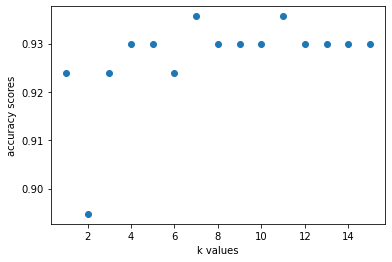

In [216]:
plt.scatter(range(1,16),accuracyscores)
plt.xlabel('k values')
plt.ylabel('accuracy scores')
plt.show()

In [217]:
knn2 = KNeighborsClassifier(n_neighbors=7)
knn2.fit(X_train,y_train)
predict=knn2.predict(X_test)
score= accuracy_score(y_test,predict)
print(score)

0.935672514619883


In [218]:
from sklearn import metrics
y_pred_proba = knn.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)

knnAUC = metrics.auc(knn_fpr, knn_tpr)
print("AUC of KNN: ",knnAUC)

AUC of KNN:  0.9631834215167547


<h1> ADABoost & XGBoost: Gabriela Cortes</h1>

In [219]:
my_AdaBoost = AdaBoostClassifier(n_estimators = 50,random_state=1)
my_AdaBoost.fit(X_train,y_train)

y_predict_boosting = my_AdaBoost.predict(X_test)
score_boosting = accuracy_score(y_test, y_predict_boosting)
print("Accuracy of Ada boosting",score_boosting)



Accuracy of Ada boosting 0.9415204678362573


In [220]:
my_XGBoost = XGBClassifier(n_estimators = 50,random_state=1)
my_XGBoost.fit(X_train, y_train)

y_predict_XGBboosting = my_XGBoost.predict(X_test)
score_XGBboosting = accuracy_score(y_test, y_predict_XGBboosting)
print("Accuracy XGB Boosting",score_XGBboosting) 



[20:40:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy XGB Boosting 0.9473684210526315


/Users/beatrizruiz/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [221]:
prob_boosting = my_AdaBoost.predict_proba(X_test) # Estimating the probability (likelihood) of Each Label: 

boostingfpr, boostingtpr, thresholds = metrics.roc_curve(y_test, prob_boosting[:,1], pos_label=1)

# print(boostingfpr)
# print(boostingtpr)

boostingAUC = metrics.auc(boostingfpr, boostingtpr)
print("AUC of Ada boosting",boostingAUC)

AUC of Ada boosting 0.98559670781893


In [222]:
predict_prob_XGBboosting = my_XGBoost.predict_proba(X_test)
XGBboostingfpr, XGBboostingtpr, thresholds = metrics.roc_curve(y_test, predict_prob_XGBboosting[:,1], pos_label=1)

# print(XGBboostingfpr)
# print(XGBboostingtpr)

XGBboostingAUC = metrics.auc(XGBboostingfpr, XGBboostingtpr)
print("XGB Boosting AUC",XGBboostingAUC)

XGB Boosting AUC 0.9847148736037624


<h1> SVM and Decision Tree: Abubakir Siedahmed </h1>

In [223]:
DT = DecisionTreeClassifier(random_state = 1)

DT.fit(X_scaled, y)

accuracy_list = cross_val_score(DT, X_scaled, y, cv = 10, scoring = 'accuracy')
print('Decision Tree Accuracy: ', accuracy_list.mean())

Decision Tree Accuracy:  0.9068609022556391


In [224]:
from sklearn import metrics

prob_dt = DT.predict_proba(X_test) # Estimating the probability (likelihood) of Each Label: 

decisionTreefpr, decisionTreetpr, thresholds = metrics.roc_curve(y_test, prob_dt[:,1], pos_label=1)

decisionTreeAUC = metrics.auc(decisionTreefpr, decisionTreetpr)
print("AUC of Decision tree: ",decisionTreeAUC)

AUC of Decision tree:  0.5


In [225]:
svm_clas = svm.SVC(C = 1, kernel = 'rbf', gamma = 0.0005, random_state = 1)

svm_clas.fit(X_train, y_train)

predict_svm = svm_clas.predict(X_test)

svm_accuracy = accuracy_score(y_test, predict_svm)
print('SVM Accuracy: ', svm_accuracy)

k = 10

pca = PCA(n_components = k)

X_train_new = pca.fit_transform(X_train)
X_test_new = pca.transform(X_test)

# print(X_train_new.shape)
# print(X_test_new.shape)

svm_clas_2 = svm.SVC(C = 1, kernel = 'rbf', gamma = 0.0005, random_state = 1)

svm_clas_2.fit(X_train_new, y_train)

predict_svm_2 = svm_clas_2.predict(X_test_new)

svm_accuracy_2 = accuracy_score(y_test, predict_svm_2)
print('SVM Accuracy (Reduced Features): ', svm_accuracy_2)

clas = svm.SVC(kernel = 'linear', probability = True)
probas_ = clas.fit(X_train, y_train).predict_proba(X_test)

SVM_fpr, SVM_tpr, thresholds = metrics.roc_curve(y_test, probas_[:, 1])
SVM_AUC = metrics.auc(SVM_fpr, SVM_tpr)
print('SVM Accuracy Using ROC: ', SVM_AUC)

SVM Accuracy:  0.9590643274853801
SVM Accuracy (Reduced Features):  0.9590643274853801
SVM Accuracy Using ROC:  0.983098177542622


<h1> ROC Curves: Pavit Chawla</h1>

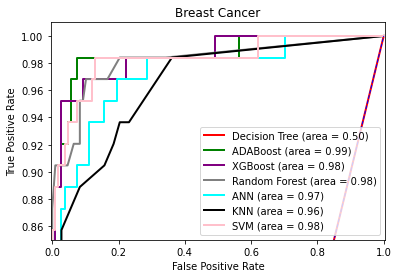

In [226]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(decisionTreefpr, decisionTreetpr, color='red', lw=2, 
         label='Decision Tree (area = %0.2f)' % decisionTreeAUC)
plt.plot(boostingfpr, boostingtpr, color='green', lw=2, 
         label='ADABoost (area = %0.2f)' % boostingAUC)
plt.plot(XGBboostingfpr, XGBboostingtpr, color='purple', lw=2, 
         label='XGBoost (area = %0.2f)' % XGBboostingAUC)
plt.plot(randomforestFpr, randomforestTpr, color='grey', lw=2, 
         label='Random Forest (area = %0.2f)' % randomforestAUC)
plt.plot(ANN_fpr, ANN_tpr, color='cyan', lw=2, 
         label='ANN (area = %0.2f)' % ANN_AUC)
plt.plot(knn_fpr, knn_tpr, color='black', lw=2, 
         label='KNN (area = %0.2f)' % knnAUC)
plt.plot(SVM_fpr, SVM_tpr, color='pink', lw=2, 
         label='SVM (area = %0.2f)' % SVM_AUC)


# plt.figure(1)
# plt.xlim(0, 0.2)
# plt.ylim(0.8, 1)
# plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.85, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Breast Cancer')
plt.legend(loc="lower right")

plt.show()